In [1]:
import numpy as np
from hilb import *
import pylab
from gaussPivot import *
import time

# Question 1

In [2]:
error1=zeros(5)
error2=zeros(5)

In [3]:
#This is the right answer but I fully have no idea what is going on here.
for n in range(2,5):
    
    A=zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            A[i][j]=(1.0*i+j)**2
    print A
    x0=np.ones(n)
    b=np.dot(A,x0)
    
    x1=np.linalg.solve(A,b)
    
    x2=gaussPivot(A,b)
    
    error1[n-2]=max(x1-x0)
    error2[n-2]=max(x2-x0)
    print(n,error1[n-2], error2[n-2])
    
# Matrix is singular

[[ 0.  1.]
 [ 1.  4.]]
(2, 0.0, 0.0)
[[  0.   1.   4.]
 [  1.   4.   9.]
 [  4.   9.  16.]]
(3, 0.0, 0.0)
[[  0.   1.   4.   9.]
 [  1.   4.   9.  16.]
 [  4.   9.  16.  25.]
 [  9.  16.  25.  36.]]


LinAlgError: Singular matrix

# Question 2

In [4]:
#create empty arrays to store the values that will be plotted
p1=[]
errors1=[]
p2=[]
errors2=[]

In [5]:
#to find the most time efficient method, the time code has been imported.
#This code starts the timer for this code to time how long this loop takes
start1=time.time()

In [6]:
#create a loop for the integers between n=2-21 (as python takes the last number as the number below the upper boundary) which:
#adds the number (n) to the array 'p1'.
#sends (n) to the hilbert matrix code to create a hilbert matrix of nxn size.
#finds the sum of this hilbert matrix
#solves the matrix using the 'linalg.solve' code and it's sum to find x
#calculates the error of this value x
#adds this value to the 'errors1' array to be later logged
#this process repeats up unitl n=20
for n in range(2,21):
    p1.append(n)
    H=hilb(n)
    B=sum(H)
    sol=np.linalg.solve(H,B)
    error=max(abs(sol))-1
    errors1.append(error)

In [7]:
#take the log of the 'errors1 matrix to be plotted.
Errors1_log = np.log(errors1)

In [8]:
#stop the first timer and begin the timer for the 'gaussPivot' code
end1=time.time()
start2=time.time()

In [9]:
#repeat the same process as above but using the gaussPivot code.
#it was previously found, using trial and error on the upper limit, that n=12 is the highest number this code can calculate for. 
for n in range(2,13):
    p2.append(n)
    H=hilb(n)
    B=sum(H)
    sol=gaussPivot(H,B)
    error=max(abs(sol))-1
    errors2.append(error)

In [10]:
#log the 'errors2' array and end the timer.
Errors2_log = np.log(errors2)
end2=time.time()

In [11]:
#from the the timers we can see the gaussPivot code is the faster code.
print end1-start1
print end2-start2

1.47300004959
1.20600008965


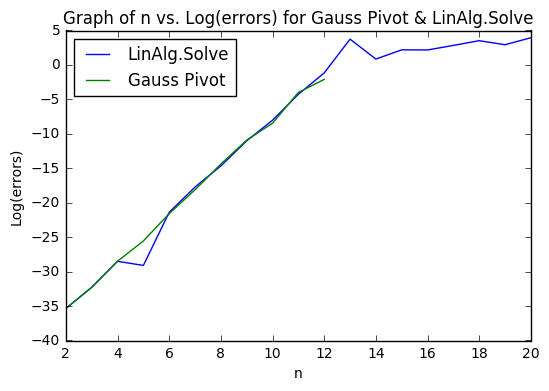

In [12]:
#plots the arrays, 'errors1' vs. 'p1' and 'errors2' vs. 'p2' with title, axis labels and legend.
pylab.plot(p1,Errors1_log, label='LinAlg.Solve')
pylab.plot(p2,Errors2_log, label='Gauss Pivot')
pylab.xlabel('n')
pylab.ylabel('Log(errors)')
pylab.title('Graph of n vs. Log(errors) for Gauss Pivot & LinAlg.Solve')
pylab.legend(loc='best')
pylab.show()

From the graph, we can see the error on the Gauss Pivot code is slightly higher than that of the LinAlg code. By running the codenumerous times for both it can also be found that the linalg.solvecode takes longer than the gaussPivot code showing the trade off between the two.